<a href="https://colab.research.google.com/github/JLEncenarial/Group-project-2/blob/main/Project_2_Group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, warnings
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.callbacks import EarlyStopping

In [2]:
import tensorflow as tf
import datetime

In [3]:
import numpy as np
import pandas as pd
import os
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image  import ImageDataGenerator, img_to_array
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob  # for getting all the files

In [4]:
%pip install wget

### Download and Unzip Data

In [5]:
def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))
import wget
import zipfile
zip_name = "train.zip"

url = "https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/vegetable_image_dataset.zip"

if not os.path.exists(zip_name):
    wget.download(url, zip_name, bar=bar_custom)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
# Generate Datasets - you can change this if desired
# ENSURE FILE PATHS MATCH CORRECTLY
IMAGE_SIZE=(224,224)
train_dir='Vegetable Images/train'
val_dir='Vegetable Images/validation'
batch_size = 16

# Load training data
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size,
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


## Data Preparation

In [7]:
# Generate Datasets - you can change this if desired
# ENSURE FILE PATHS MATCH CORRECTLY
IMAGE_SIZE=(224,224)
train_dir='Vegetable Images/train'
val_dir='Vegetable Images/validation'
batch_size = 16

# Load training data
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size,
)


Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [8]:
train_ds = train_ds.repeat()
val_ds = val_ds.repeat()

## Custom Model Training

In [9]:


model = Sequential()  # make a new sequential NN model

# two convolution layers with pooling in between, this is the feature learning part of our model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)))
model.add(MaxPooling2D())

# this is where the classification will happen in our model
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # helps prevent overfitting on the data
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
hist = model.fit(train_ds,
                 steps_per_epoch=50,
                 epochs=50,
                 validation_data=val_ds,
                 validation_steps=25)

Epoch 1/50
50/50 [==============================] - 12s 69ms/step - loss: 393.6624 - accuracy: 0.1112 - val_loss: 2.5419 - val_accuracy: 0.2225
Epoch 2/50
50/50 [==============================] - 3s 65ms/step - loss: 2.6732 - accuracy: 0.1838 - val_loss: 2.4466 - val_accuracy: 0.2425
Epoch 3/50
50/50 [==============================] - 4s 73ms/step - loss: 2.7545 - accuracy: 0.1963 - val_loss: 2.4773 - val_accuracy: 0.2625
Epoch 4/50
50/50 [==============================] - 4s 85ms/step - loss: 2.9283 - accuracy: 0.2188 - val_loss: 2.2238 - val_accuracy: 0.3300
Epoch 5/50
50/50 [==============================] - 3s 70ms/step - loss: 5.4127 - accuracy: 0.2500 - val_loss: 2.4887 - val_accuracy: 0.2925
Epoch 6/50
50/50 [==============================] - 4s 70ms/step - loss: 2.8586 - accuracy: 0.2825 - val_loss: 2.2686 - val_accuracy: 0.4025
Epoch 7/50
50/50 [==============================] - 4s 75ms/step - loss: 2.3934 - accuracy: 0.3075 - val_loss: 2.0532 - val_accuracy: 0.3825
Epoch 8/50

## Test Best Models and Illustrate Results

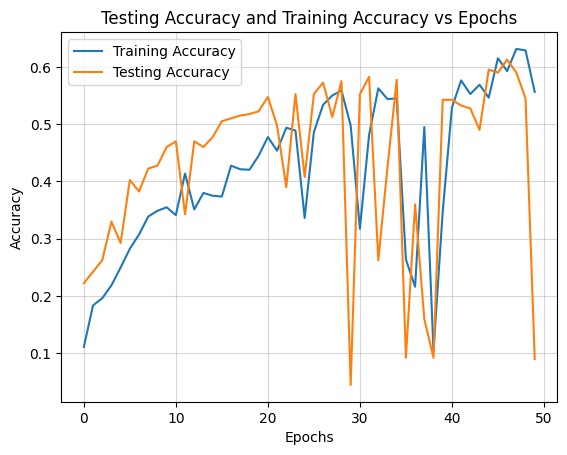

In [11]:
#plotting the results

plt.figure(4)
plt.plot(hist.history["accuracy"],label = "Training Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Testing Accuracy")
plt.legend()
plt.grid(axis='both',alpha=0.5)
plt.title("Testing Accuracy and Training Accuracy vs Epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [12]:
test_dir='Vegetable Images/test'
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size,
)

Found 3000 files belonging to 15 classes.


In [15]:
#testing the accuracy

test_loss, test_accuracy = model.evaluate(test_ds)
test_accuracy

188/188 [==============================] - 3s 14ms/step - loss: 92.9501 - accuracy: 0.0773


0.07733333110809326